In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
scotrail = pd.read_csv('Datasets/scotrail-journey-data-2016-2022.csv')

In [33]:
scotrail.head()

,CalendarYear,CalendarPeriod,CalendarWeek,ServiceGroup4,ProdGrp1,OpJourneys on selDates,OpMiles on selDates,Unnamed: 7
0,2016,2016/P01,2016/W01,East Suburban,Commuter,"68,625","1,163,739",NaN
1,2016,2016/P01,2016/W01,eXpress,Commuter,"33,695","953,075",NaN
2,2016,2016/P01,2016/W01,Inter7City,Commuter,"27,651","757,075",NaN
3,2016,2016/P01,2016/W01,Scenic,Commuter,"9,806","180,878",NaN
4,2016,2016/P01,2016/W01,West Suburban,Commuter,"302,609","3,303,754",NaN


In [34]:

scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].replace(',','', regex=True)
scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].astype('int')

In [35]:
df = scotrail.groupby(['ServiceGroup4','CalendarPeriod'])['OpJourneys on selDates'].sum().reset_index()
df

,ServiceGroup4,CalendarPeriod,OpJourneys on selDates
0,East Suburban,2016/P01,1002385
1,East Suburban,2016/P02,841188
2,East Suburban,2016/P03,752603
3,East Suburban,2016/P04,877365
4,East Suburban,2016/P05,836859
...,...,...,...
400,eXpress,2021/P12,414883
401,eXpress,2021/P13,186402
402,eXpress,2022/P01,299867
403,eXpress,2022/P02,337312


In [36]:
df2 = df[df["ServiceGroup4"] == 'Scenic']
df2

,ServiceGroup4,CalendarPeriod,OpJourneys on selDates
162,Scenic,2016/P01,288862
163,Scenic,2016/P02,258091
164,Scenic,2016/P03,238673
165,Scenic,2016/P04,289722
166,Scenic,2016/P05,278445
...,...,...,...
238,Scenic,2021/P12,186145
239,Scenic,2021/P13,92853
240,Scenic,2022/P01,166440
241,Scenic,2022/P02,176517


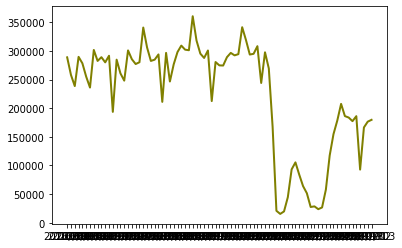

In [37]:
plt.plot( 'CalendarPeriod', 'OpJourneys on selDates', data=df2, marker='', color='olive', linewidth=2);

In [71]:
journeys = df['OpJourneys on selDates']
service = df['ServiceGroup4']

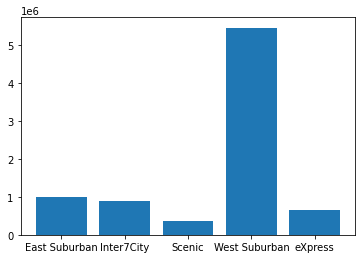

In [39]:
plt.bar(service,journeys);

In [40]:
scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].replace(',','', regex=True)
scotrail["OpJourneys on selDates"] = scotrail["OpJourneys on selDates"].astype('int')

scotrail["OpMiles on selDates"] = scotrail["OpMiles on selDates"].replace(',','', regex=True)
scotrail["OpMiles on selDates"] = scotrail["OpMiles on selDates"].astype('int')

scotrail["milesdivjourney"] = scotrail["OpMiles on selDates"] / scotrail["OpJourneys on selDates"]

In [41]:
scotrail.head

<bound method NDFrame.head of       CalendarYear CalendarPeriod CalendarWeek  ServiceGroup4  ProdGrp1  \
0             2016       2016/P01     2016/W01  East Suburban  Commuter   
1             2016       2016/P01     2016/W01        eXpress  Commuter   
2             2016       2016/P01     2016/W01     Inter7City  Commuter   
3             2016       2016/P01     2016/W01         Scenic  Commuter   
4             2016       2016/P01     2016/W01  West Suburban  Commuter   
...            ...            ...          ...            ...       ...   
4870          2022       2022/P03     2022/W13  East Suburban      Peak   
4871          2022       2022/P03     2022/W13        eXpress      Peak   
4872          2022       2022/P03     2022/W13     Inter7City      Peak   
4873          2022       2022/P03     2022/W13         Scenic      Peak   
4874          2022       2022/P03     2022/W13  West Suburban      Peak   

      OpJourneys on selDates  OpMiles on selDates  Unnamed: 7  milesd

In [42]:
np.max(scotrail["milesdivjourney"])

96.51901624033623

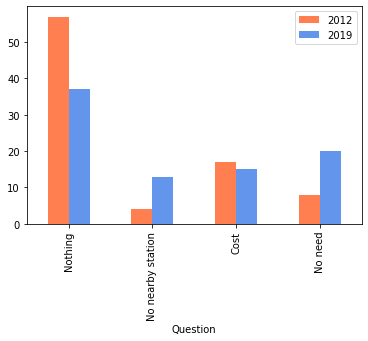

In [78]:
# What are the main reasons of Scottish locals for not using the train?

train_discourage = pd.read_csv('Datasets/train_discourage.csv')
train_discourage.rename(columns = {'Table 42: In general, What discourages you from using the train more often than you do? (2012-2014, 2016, 2019)1,2':'Question', 'Unnamed: 1':'2012', 'Unnamed: 2':'2013', 'Unnamed: 3':'2014', 'Unnamed: 4':'2015', 'Unnamed: 5':'2016','Unnamed: 6':'2017', 'Unnamed: 7':'2018', 'Unnamed: 8':'2019', 'Unnamed: 9':'2020'}, inplace = True)

# In general, What discourages you from using the train more often than you do?

train_discourage = train_discourage.drop(train_discourage.index[33])
train_discourage = train_discourage.drop(train_discourage.index[32])
train_discourage = train_discourage.drop(train_discourage.index[31])
train_discourage = train_discourage.drop(train_discourage.index[30])
train_discourage = train_discourage.drop(train_discourage.index[0])

train_discourage_selection = train_discourage.iloc[:, [0,1,8]]
train_discourage_selection = train_discourage_selection.iloc[[0,1,7,16],:]

train_discourage_selection['2012']=train_discourage_selection['2012'].astype(float)
train_discourage_selection['2019']=train_discourage_selection['2019'].astype(float)

train_discourage_selection.plot(x="Question", y=["2012", "2019"], kind="bar", color=["coral", "cornflowerblue"]);

In [ ]:
local_train_view = pd.read_csv('Datasets/local_train_views.csv')

In [84]:

carbon_ds = pd.read_csv('Datasets/carbon-footprint-travel-mode.csv', dtype = str)
carbon_ds = carbon_ds.drop(['Code', 'Year'], 1)
carbon_ds['GHG emissions (gCO2e/km)'] = carbon_ds['GHG emissions (gCO2e/km)'].astype(float).round(2)
carbon_ds = carbon_ds.sort_values(by=["GHG emissions (gCO2e/km)"], ascending=False)
travel = ['Domestic flight', 'Large car (petrol)', 'Bus', 'National rail' ]
carbon_ds = carbon_ds.loc[carbon_ds['Entity'].isin(travel)]
carbon_ds

,Entity,GHG emissions (gCO2e/km)
11,Large car (petrol),282.95
5,Domestic flight,254.93
1,Bus,104.71
28,National rail,41.15


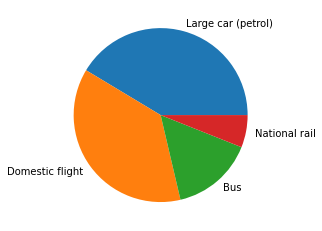

In [86]:
plt.pie(carbon_ds['GHG emissions (gCO2e/km)'], labels = carbon_ds["Entity"])
plt.show()